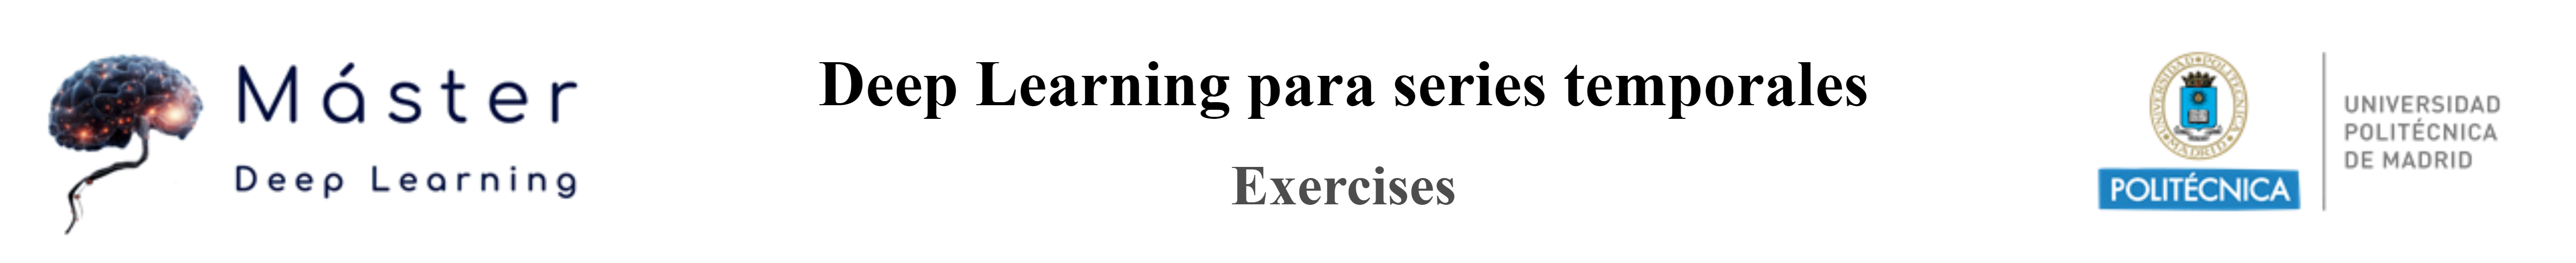

# Time Series  |   Part I: Introduction

Wellcome to the first Python Notebook in the subject. Take it at a workbook! You can go through the cell and execute and complete the code. The more you advance, the more mark.

Go Learn!

Each Notebook will be associated to a part of the subject. This first Notebook is an starter pack on time series related to Part I: Introduction. You will find a starter-pack introductory exercise for understanding and visualize time-series using python.
⏩ *Let's start!* ⏩

## Install dependencies

In [1]:
#! pip install pypandoc
# --- Saving as pdf libraries
#! pip install pypandoc
#! pip install pandoc
#! apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
#!apt-get install pandoc
# --- Kaggle
#!pip3 install fastkaggle

## Exercise I: dimensions
Execute the code below to import load and visualize and example time series.

In [ ]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

### Extract time series data from csv using pandas
** You will need to upload the /exercises/data/ folder for this exercises. Upload only the neccessary .csv to avoid memory errors **

In [ ]:
# Load the univariate time series data
data = pd.read_csv('./data/univariate_timeseries.csv', index_col=0, parse_dates=True)

### A first view of the data using matplotlib

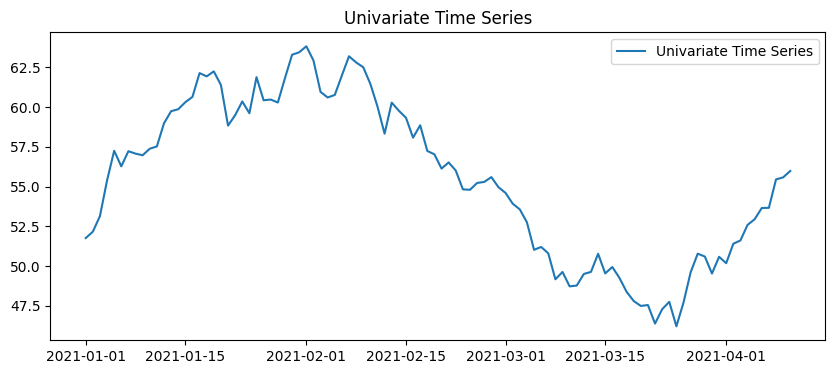

In [ ]:
# Visualize the time series
plt.figure(figsize=(10, 4))
plt.plot(data, label='Univariate Time Series')
plt.title('Univariate Time Series')
plt.legend()
plt.show()

### Dimensions analysis
- Check the length of the time series
- Check the number of variables

In [ ]:
# Length
### Use length
#print(f"Length of the time series: {###}")

Length of the time series: 100


In [ ]:
# Shape
### Use shape
###print(f"Length of the time series: {##len##} | {##numvars##} ")

Length of the time series: 100 | 1 


Write with your own words in this cell what does the results of the previous cell mean.
- What does the length of the time series value mean?
- How many features are we analyzing, what type of time series is it and why? (univariate/multivariate)

### Now, other dataset
Use data2 & data3 new variables to make the same analysis for the "multivariate_timeseries" and "irregular_timeseries" files.  [Important to use different variables, you will need "data" in the future]

Include a markdown cell with the conclusions:
- What length does each time series have? Does it makes sense?
- Are they univariate or multivariate? How many variables does each of them have.

In [ ]:
#### Complete, add cells

## Exercise II: Trend and seasonality analysis

1) Take a look to the time series. Do you have any first view on trend / sesasonality?

2) Execute the cell below, check your answer and complete the answering cell with few words.

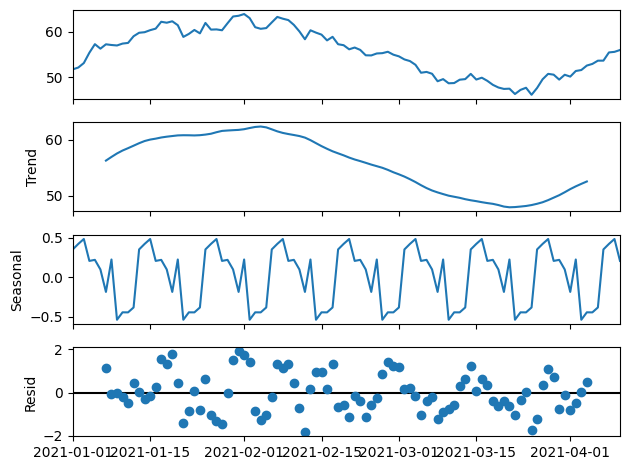

In [ ]:
# Decomposing the time series into data(t) = Trend(t)+Seasonality(t)+Irregular(t)
result = seasonal_decompose(data, model='additive', period=12)
result.plot()
plt.show()

Add your analysis in this cell, including wether is a clear global trend/seasonality and the approximate periods of trend/seasonality you may observe.
- Trend:
- Seasonality:

### Generating time series
#### Generate a synthetic time series using additive decomposition
Use the function below to generate:
- A time series with no seasonality
- A time series with upper trend
- A mean stationary time series
- A stationary time series

#### Modify the functions to use multiplicative decomposition
Modify de function to use multiplicative decomposition  and redo the examples with the modification.

In [ ]:
def generate_additive_time_series(length=100, noise_percentage=10, trend_slope=0.5, seasonality_range=20):
    """
    Generate an additive time series with specified characteristics.

    Parameters:
        length (int): Length of the time series.
        noise_percentage (float): Percentage of noise to add to the series.
        trend_slope (float): Slope of the trend component.
        seasonality_range (float): Amplitude of the seasonal component.

    Returns:
        pd.DataFrame: A DataFrame containing the components and the resulting time series.
    """
    # Time index
    time = np.arange(length)

    # Generate components
    trend = trend_slope * time
    seasonality = seasonality_range * np.sin(2 * np.pi * time / length * 12)  # 12-period seasonality
    noise = (noise_percentage / 100) * np.random.randn(length) * np.max(np.abs(seasonality + trend))

    # Combine components
    series = trend + seasonality + noise

    # Create DataFrame
    data = pd.DataFrame({
        "Trend": trend,
        "Seasonality": seasonality,
        "Noise": noise,
        "Series": series
    })

    return data
    import matplotlib.pyplot as plt

def plot_additive_decomposition(dataframe, figsize=(15, 4), final_figsize=(15, 6)):
    """
    Plots an additive decomposition of a time series with trend, seasonality, noise,
    and the final series in a structured format.

    Parameters:
        dataframe (pd.DataFrame): DataFrame containing columns 'Trend', 'Seasonality',
                                  'Noise', and 'Series'.
        figsize (tuple): Figure size for the row of components (trend, seasonality, noise, and symbols).
        final_figsize (tuple): Figure size for the larger subplot (final series).
    """
    fig, axs = plt.subplots(1, 5, figsize=figsize, gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3]})

    # Plot Trend
    axs[0].plot(dataframe.index, dataframe["Trend"], label="Trend", color="blue")
    axs[0].set_title("Trend")
    axs[0].grid()
    axs[0].legend()

    # Draw "+"
    axs[1].text(0.5, 0.5, "+", fontsize=20, ha='center', va='center', transform=axs[1].transAxes)
    axs[1].axis('off')

    # Plot Seasonality
    axs[2].plot(dataframe.index, dataframe["Seasonality"], label="Seasonality", color="green")
    axs[2].set_title("Seasonality")
    axs[2].grid()
    axs[2].legend()

    # Draw "+"
    axs[3].text(0.5, 0.5, "+", fontsize=20, ha='center', va='center', transform=axs[3].transAxes)
    axs[3].axis('off')

    # Plot Noise
    axs[4].plot(dataframe.index, dataframe["Noise"], label="Noise", color="orange")
    axs[4].set_title("Noise")
    axs[4].grid()
    axs[4].legend()

    # Adjust layout for the first row
    plt.tight_layout()
    plt.show()

    # Draw "=" and plot Final Series
    fig, ax = plt.subplots(figsize=(final_figsize))
    ax.text(0.5, 0.5, "=", fontsize=20, ha='center', va='center', transform=ax.transAxes)
    ax.axis('off')
    plt.show()

    fig, ax = plt.subplots(figsize=(final_figsize))
    ax.plot(dataframe.index, dataframe["Series"], label="Final Series", color="red")
    ax.set_title("Final Additive Series")
    ax.grid()
    ax.legend()
    plt.show()

In [ ]:
import numpy as np
np.random.seed(0)

synthetic_data = pd.DataFrame({
    'Time': pd.date_range(start='2021-01-01', periods=100, freq='D'),
    'Value': np.random.normal(loc=0, scale=1, size=100).cumsum() + 50
})

## Extra information
How to install & download data from kaggle
### Install & configure

Install and configure kaggle's API.
Instructions: https://medium.com/@victoiresagbo2/how-to-set-up-kaggle-credentials-with-the-kaggle-json-file-3c0531441106#:~:text=How%20to%20Set%20Up%20Kaggle%20Credentials%20with%20the,...%205%20Step%205%3A%20Verify%20the%20Setup%20

Note:
The API menu is on https://www.kaggle.com/settings not in Perfil/Account :)

Note 2: Remember to upload the .kaggle.json file to Google Collab if using it for opening jupyter notebooks so you can execute the commands.

In [ ]:
! mkdir -p ~/.kaggle
! mv ./kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import fastkaggle

In [ ]:
api = fastkaggle.import_kaggle()

### Download & filter some data

Here is the "Tourist Arrival in Rio de Janeiro" dataset. Take a look to the structure of the data, extract the information about Cabo Verde and analyze its length, stationarity, etcétera as above.

In [ ]:
#url = "https://www.kaggle.com/datasets/victorsoeiro/tourist-arrivals-in-rio-de-janeiro-20062019?resource=download"
local_data_path = "./data"
dataset_slug = "victorsoeiro/tourist-arrivals-in-rio-de-janeiro-20062019"
fastkaggle.get_dataset(
    dataset_slug=dataset_slug,
    dataset_path=local_data_path,
    unzip=True,
    force=True
  )

Dataset URL: https://www.kaggle.com/datasets/victorsoeiro/tourist-arrivals-in-rio-de-janeiro-20062019


In [ ]:
import pandas as pd
import numpy as np

In [ ]:

# If not created, create a folder "data" as our database
#! mkdir data
# Download the dataset
! wget {url}

--2025-02-18 10:09:16--  http://%7Burl%7D/
Resolving {url} ({url})... failed: Name or service not known.
wget: unable to resolve host address ‘{url}’


In [ ]:
# Check the file has succesfully been downloaded
! ls './data/tourist'*

./data/tourists-rj-2006-2019.csv


In [ ]:
dataFrame = pd.read_csv("./data/tourists-rj-2006-2019.csv")

In [ ]:
dataFrame.columns

Index(['País', 'Total', 'Aérea', 'Marítima', 'Região', 'Continente', 'Ano'], dtype='object')

In [ ]:
dataFrame_filtered = filtered_data = dataFrame[dataFrame['País'] == 'Spain']

In [ ]:
dataFrame.head()

,País,Total,Aérea,Marítima,Região,Continente,Ano
0,África do Sul,3545,3012,533,África,África,2006
1,Angola,21662,21606,56,África,África,2006
2,Cabo Verde,2407,2407,0,África,África,2006
3,Nigéria,238,233,5,África,África,2006
4,Outros,1900,1783,117,África,África,2006


In [ ]:
dataFrame_filtered.head()

,País,Total,Aérea,Marítima,Região,Continente,Ano


In [ ]:
dataFrame_filtered = dataFrame_filtered.set_index('Ano')['Total']

In [ ]:
display(dataFrame_filtered.head())
print(dataFrame_filtered.shape)

,Total
Ano,


(0,)


## Download as pdf

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount("/content/drive")
nbs_path =  '/content/drive/MyDrive/SERTEMP-Collab'
nbs_name = '01_Introduction_exercises'
! ls {nbs_path}/{nbs_name}.ipynb
!jupyter nbconvert --to PDF {nbs_path}/{nbs_name}.ipynb --output /{nbs_path}/{nbs_name}.pdf
files.download(f'{nbs_path}/{nbs_name}.pdf')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SERTEMP-Collab/01_Introduction_exercises.ipynb
[NbConvertApp] Converting notebook /content/drive/MyDrive/SERTEMP-Collab/01_Introduction_exercises.ipynb to PDF
[NbConvertApp] Support files will be in //content/drive/MyDrive/SERTEMP-Collab/01_Introduction_exercises_files/
[NbConvertApp] Writing 41841 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 142702 bytes to //content/drive/MyDrive/SERTEMP-Collab/01_Introduction_exercises.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📖 **To be continued...**